# Workshop 1: Convolution 2D

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
image = np.array([[1, 0, 2, 1, 0], 
                  [0, 2, 3, 0, 1], 
                  [1, 0, 1, 1, 2], 
                  [0, 2, 2, 0, 3], 
                  [0, 4, 1, 2, 0]])
image = image / 5.0
image

array([[0.2, 0. , 0.4, 0.2, 0. ],
       [0. , 0.4, 0.6, 0. , 0.2],
       [0.2, 0. , 0.2, 0.2, 0.4],
       [0. , 0.4, 0.4, 0. , 0.6],
       [0. , 0.8, 0.2, 0.4, 0. ]])

In [ ]:
kernel1 = np.array([[-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]])
im2 = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)
im2

array([[ 0. ,  1.4, -0.6, -1.2,  0. ],
       [ 0. ,  0.8,  0. , -0.6,  0. ],
       [ 0. ,  1. , -0.6,  0. ,  0. ],
       [ 0. ,  0.6, -0.6,  0.2,  0. ],
       [ 0. ,  1. , -1.2,  0.2,  0. ]])

In [ ]:
im2_int = (im2 * 5).astype('int')
im2_int

array([[ 0,  7, -3, -6,  0],
       [ 0,  4,  0, -3,  0],
       [ 0,  5, -3,  0,  0],
       [ 0,  3, -3,  0,  0],
       [ 0,  5, -6,  0,  0]])

# Workshop 2: Feature Map

In [ ]:
image = cv2.imread('/content/ปุยเมฆ.jpg')

if image is None:
  print('Could not read image')

kernel1 = np.array([[-1, 0, 1], 
                    [-3, 0, 3], 
                    [-1, 0, 1]])
kernel2 = np.array([[-1, -3, -1], 
                    [0, 0, 0], 
                    [1, 3, 1]])
kernel3 = np.array([[0, 1, 3], 
                    [-1, 0, 1], 
                    [-3, -1, 0]])
kernel4 = np.array([[-3, -1, 0], 
                    [-1, 0, 1], 
                    [0, 1, 3]])
kernel5 = np.array([[-1, -1, -1], 
                    [-1, 8, -1], 
                    [-1, -1, -1]])

fea_map1 = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)
fea_map2 = cv2.filter2D(src=image, ddepth=-1, kernel=kernel2)
fea_map3 = cv2.filter2D(src=image, ddepth=-1, kernel=kernel3)
fea_map4 = cv2.filter2D(src=image, ddepth=-1, kernel=kernel4)
fea_map5 = cv2.filter2D(src=image, ddepth=-1, kernel=kernel5)

fig = plt.figure(figsize=(18, 18))

fig.add_subplot(3, 3, 1)
plt.imshow(image[:, :, ::-1])
plt.title("Original")

fig.add_subplot(3, 3, 2)
plt.imshow(fea_map1[:, :, ::-1])
plt.title("Feature1")

fig.add_subplot(3, 3, 3)
plt.imshow(fea_map2[:, :, ::-1])
plt.title("Feature2")

fig.add_subplot(3, 3, 4)
plt.imshow(fea_map3[:, :, ::-1])
plt.title("Feature3")

fig.add_subplot(3, 3, 5)
plt.imshow(fea_map4[:, :, ::-1])
plt.title("Feature4")

fig.add_subplot(3, 3, 6)
plt.imshow(fea_map5[:, :, ::-1])
plt.title("Feature5")

cv2.imwrite('feature-map1.jpg', fea_map1)
cv2.imwrite('feature-map2.jpg', fea_map2)
cv2.imwrite('feature-map3.jpg', fea_map3)
cv2.imwrite('feature-map4.jpg', fea_map4)
cv2.imwrite('feature-map5.jpg', fea_map5)
cv2.waitKey()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# Workshop 3: Pooling

In [ ]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D, Conv2D, Flatten, Dense

In [ ]:
image = np.array([[2, 3, 4, 2], 
                  [8, 5, 5, 1], 
                  [6, 7, 9, 4], 
                  [3, 1, 4, 5]])
arr = image.reshape(1, 4, 4, 1)
arr

array([[[[2],
         [3],
         [4],
         [2]],

        [[8],
         [5],
         [5],
         [1]],

        [[6],
         [7],
         [9],
         [4]],

        [[3],
         [1],
         [4],
         [5]]]])

In [ ]:
model = Sequential()
model.add(MaxPool2D(2, 2))
output = model.predict(arr)
output = np.squeeze(output)
output

1/1 [==============================] - 0s 124ms/step


array([[8, 5],
       [7, 9]])

In [ ]:
arr = image.reshape(1, 4, 4, 1).astype('float32')
arr

array([[[[2.],
         [3.],
         [4.],
         [2.]],

        [[8.],
         [5.],
         [5.],
         [1.]],

        [[6.],
         [7.],
         [9.],
         [4.]],

        [[3.],
         [1.],
         [4.],
         [5.]]]], dtype=float32)

In [ ]:
model = Sequential()
model.add(AveragePooling2D(2, 2))
output = model.predict(arr)
output = np.squeeze(output)
output

1/1 [==============================] - 4s 4s/step


array([[4.5 , 3.  ],
       [4.25, 5.5 ]], dtype=float32)

# Workshop 4: Pooling ต่อจาก Convolution

In [ ]:
from PIL import Image, ImageOps

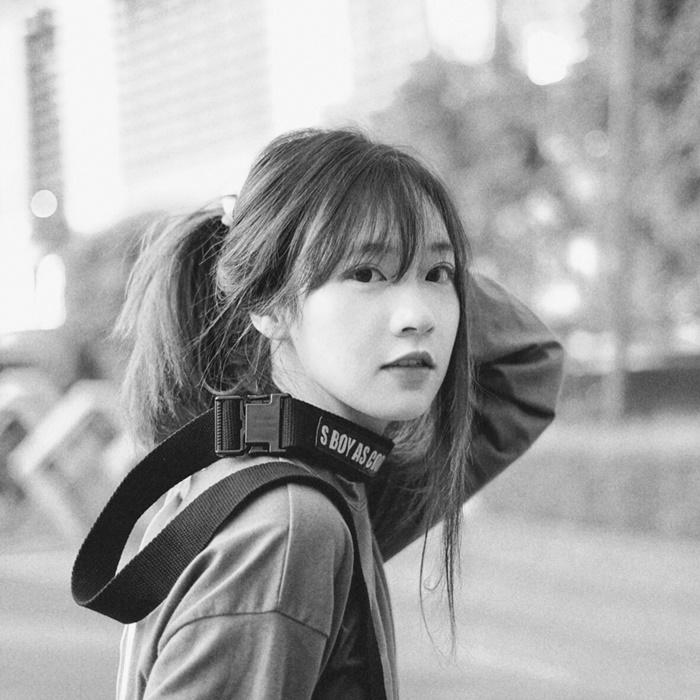

In [ ]:
imgfile = '/content/ปุยเมฆ.jpg'
image = Image.open(imgfile).convert('L')
image

In [ ]:
pixel = np.array(image)
pixel.shape

(700, 700)

1/1 [==============================] - 0s 94ms/step


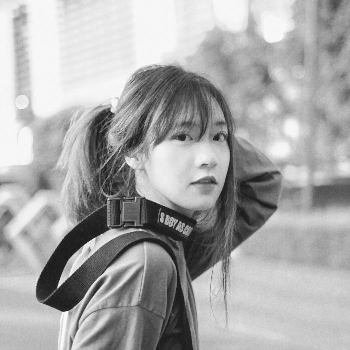

In [ ]:
arr = pixel.reshape(1, 700, 700, 1)
model = Sequential()
model.add(MaxPool2D(pool_size=(2, 2)))
output = model.predict(arr)
output = np.squeeze(output)
Image.fromarray(output)

1/1 [==============================] - 0s 67ms/step


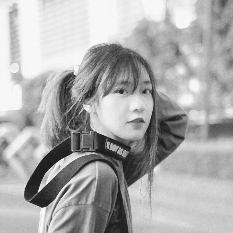

In [ ]:
arr = pixel.reshape(1, 700, 700, 1)
model = Sequential()
model.add(MaxPool2D(pool_size=(3, 3)))
output = model.predict(arr)
output = np.squeeze(output)
Image.fromarray(output)

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 128)              

# Workshop 5: สร้าง Model และดู Kernel

In [ ]:
in_shape = (100, 100, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=in_shape))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 128)     

In [ ]:
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  kernels, biases = layer.get_weights()
  print(layer.name, 'shape:', kernels.shape)

conv2d_2 shape: (3, 3, 3, 32)
conv2d_3 shape: (3, 3, 32, 64)
conv2d_4 shape: (3, 3, 64, 128)


In [ ]:
model_layer_idx = 0
kernels, biases = model.layers[model_layer_idx].get_weights()
kernels.shape, biases.shape

((3, 3, 3, 32), (32,))

In [ ]:
k_min, k_max = kernels.min(), kernels.max()
kernels = (kernels - k_min) / (k_max - k_min)
kernel_idx = 0
kernel_i = kernels[:, :, 0, kernel_idx]
print(kernel_i.round(2))

[[0.44 0.33 0.37]
 [0.49 0.25 0.39]
 [0.75 0.69 0.34]]


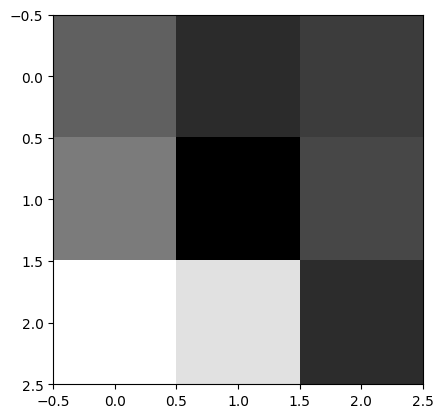

In [ ]:
plt.imshow(kernel_i, cmap=plt.cm.gray)
plt.show()

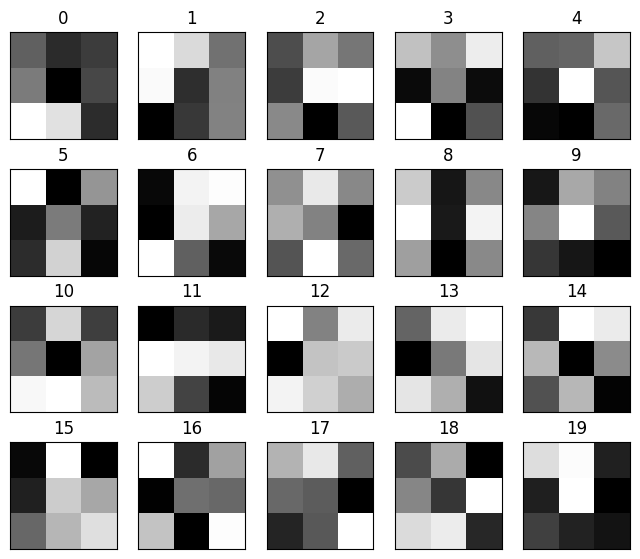

In [ ]:
nplots = 20
fig = plt.figure(figsize=(8, 6.8))
for j in range(nplots):
  plt.subplot(4, 5, j+1)
  plt.imshow(kernels[:, :, 0, j], cmap=plt.cm.gray)
  plt.title(j)
  plt.xticks([]); plt.yticks([])
plt.show()

# Workshop 6: ดู Feature map

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot

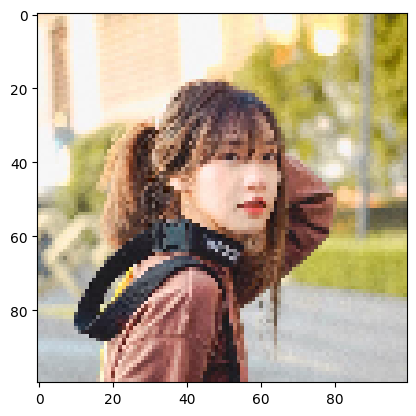

In [ ]:
image = load_img('/content/ปุยเมฆ.jpg', target_size=(100, 100))
plt.imshow(image)
plt.show()

In [ ]:
img = img_to_array(image)
print('shape=', img.shape)
print('max pixel value=', np.max(img))

shape= (100, 100, 3)
max pixel value= 255.0


In [ ]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 100, 100, 3)

In [ ]:
layer_idx = 0
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 4s 4s/step


(1, 98, 98, 32)

In [ ]:
f_min, f_max = feature_maps.min(), feature_maps.max()
feature_maps = (feature_maps - f_min) / (f_max - f_min)
feature_maps.min(), feature_maps.max()

(0.0, 1.0)

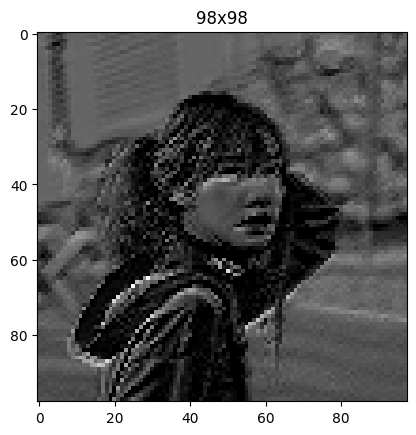

In [ ]:
sample_idx = 0
fea_idx = 0
feature_map_i = feature_maps[sample_idx, :, :, fea_idx]

plt.title('{0}x{1}'.format(feature_map_i.shape[0], feature_map_i.shape[0]))
plt.imshow(feature_map_i, cmap=plt.cm.gray)
plt.show()

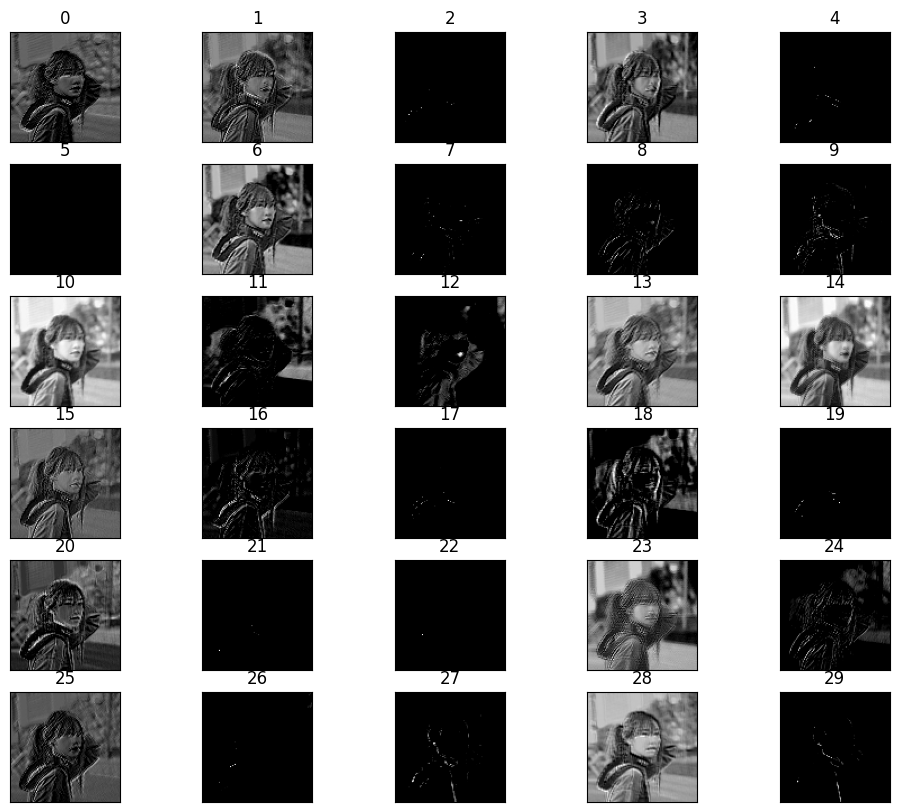

In [ ]:
nplots = 30
fig = plt.figure(figsize=(12, 10))
for j in range(nplots):
  plt.subplot(6, 5, j+1)
  plt.imshow(feature_maps[sample_idx, :, :, j], cmap=plt.cm.gray)
  plt.title(j)
  plt.xticks([]); plt.yticks([])

plt.show()

# Workshop 7: ข้อมูลตัวเลขลายมือ

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
X_train : (60000, 28, 28)
X_test : (10000, 28, 28)
y_train : (60000,)
y_test : (10000,)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

In [ ]:
np.isnan(X_train).sum()

0

In [ ]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


# Workshop 8: Visualization แสดงภาพตัวเลข

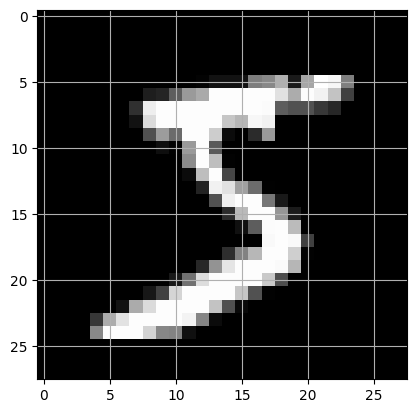

In [ ]:
img = X_train[0]
plt.imshow(img, cmap=plt.cm.gray)
plt.grid()
plt.show()

In [ ]:
def visual_multi(i):
  nplots = 40
  fig = plt.figure(figsize=(8, 4))
  for j in range(nplots):
    plt.subplot(4, 10, j+1)
    plt.imshow(X_train[i+j])
    plt.xticks([]); plt.yticks([])
  plt.show()

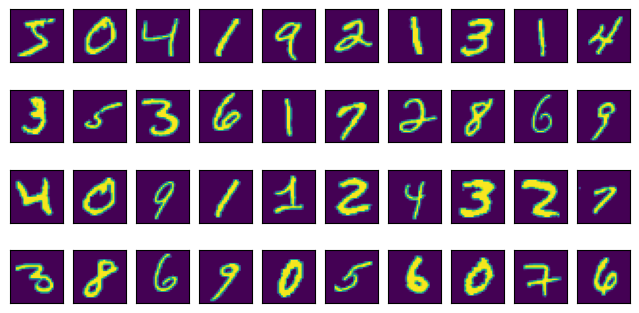

In [ ]:
visual_multi(0)

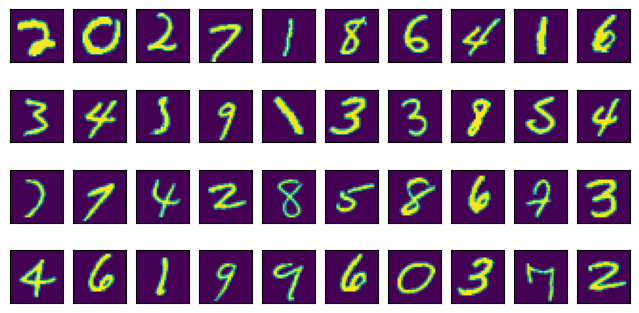

In [ ]:
visual_multi(120)

# Workshop 9: เตรียมข้อมูลเพื่อ Train และ Test

## จัดรูปแบบโครงสร้าง

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (60000, 28, 28, 1)
X_test : (10000, 28, 28, 1)


## Normalization

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32')  /255.0
X_train[0, 10, 10:15]

array([[0.00392157],
       [0.6039216 ],
       [0.99215686],
       [0.3529412 ],
       [0.        ]], dtype=float32)

## เลือกจำนวน

In [ ]:
num_samples = 10000
X_train = X_train[:num_samples]
y_train = y_train[:num_samples]

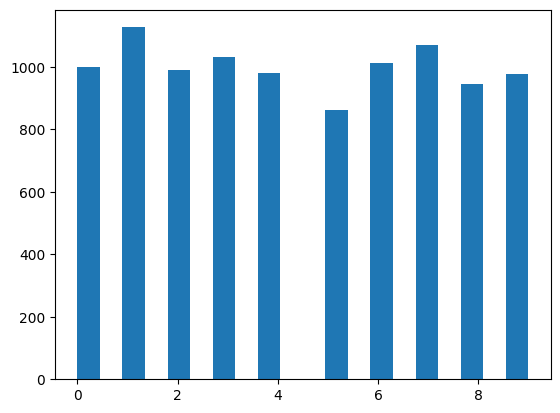

In [ ]:
plt.hist(y_train, 20)
plt.show()

In [ ]:
print('Train: X={0}, y={1}'.format(X_train.shape, y_train.shape))
print('Test: X={0}, y={1}'.format(X_test.shape, y_test.shape))

Train: X=(10000, 28, 28, 1), y=(10000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


# Workshop 10: สร้าง Model

In [ ]:
num_classes = len(np.unique(y_train))
num_classes

10

In [ ]:
in_shape = X_train.shape[1:]
in_shape

(28, 28, 1)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

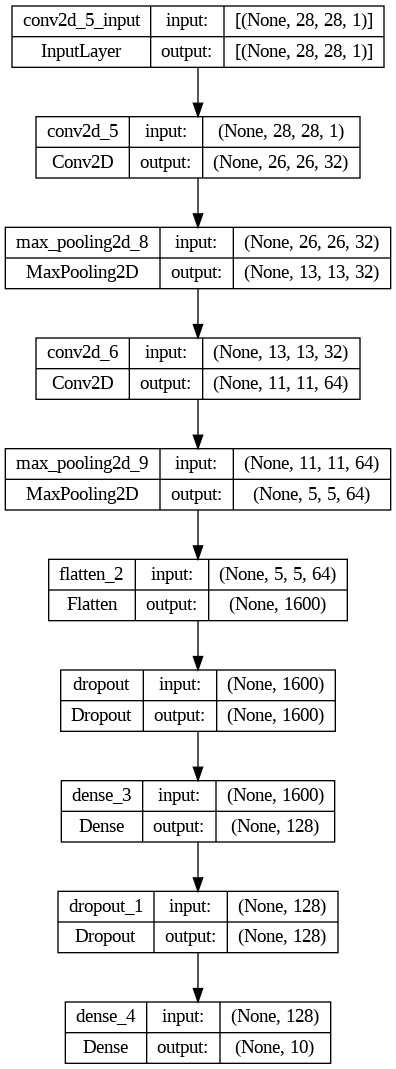

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'digit.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

import time
start = time.time()

history = model.fit(X_train, y_train, epochs=15, batch_size=128, verbose=1, validation_split=0.1)

end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/15
71/71 [==============================] - 5s 12ms/step - loss: 1.1430 - accuracy: 0.6269 - val_loss: 0.2723 - val_accuracy: 0.9150
Epoch 2/15
71/71 [==============================] - 0s 5ms/step - loss: 0.3746 - accuracy: 0.8887 - val_loss: 0.1684 - val_accuracy: 0.9540
Epoch 3/15
71/71 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.9249 - val_loss: 0.1358 - val_accuracy: 0.9620
Epoch 4/15
71/71 [==============================] - 0s 5ms/step - loss: 0.2076 - accuracy: 0.9390 - val_loss: 0.1048 - val_accuracy: 0.9720
Epoch 5/15
71/71 [==============================] - 0s 5ms/step - loss: 0.1669 - accuracy: 0.9506 - val_loss: 0.0953 - val_accuracy: 0.9770
Epoch 6/15
71/71 [==============================] - 0s 5ms/step - loss: 0.1576 - accuracy: 0.9538 - val_loss: 0.0920 - val_accuracy: 0.9760
Epoch 7/15
71/71 [==============================] - 0s 5ms/step - loss: 0.1324 - accuracy: 0.9618 - val_loss: 0.0754 - val_accuracy: 0.9780
Epoch 8/15
71/71 [=

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0508 - accuracy: 0.9830
Accuracy: 0.983


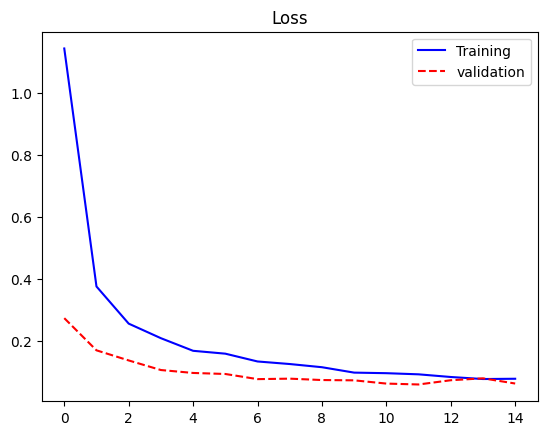

In [ ]:
plt.plot(history.history['loss'], color='b', label='Training')
plt.plot(history.history['val_loss'], 'r--', label='validation')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('./mymodel.h5')

# Workshop 11: ดูตัวเลขที่ทำนายผิด

In [ ]:
y_pred = model.predict(X_test)
y_pred_cls = np.argmax(y_pred, axis=1)
idx_miss = np.where(y_pred_cls != y_test)
print(len(idx_miss[0]))

313/313 [==============================] - 1s 2ms/step
170


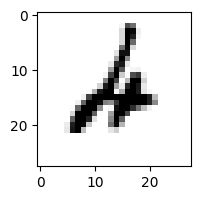

In [ ]:
fig = plt.figure(figsize=(2, 2))
plt.imshow(X_test[idx_miss][0].reshape(28, 28), cmap=plt.cm.gray_r)
plt.show()

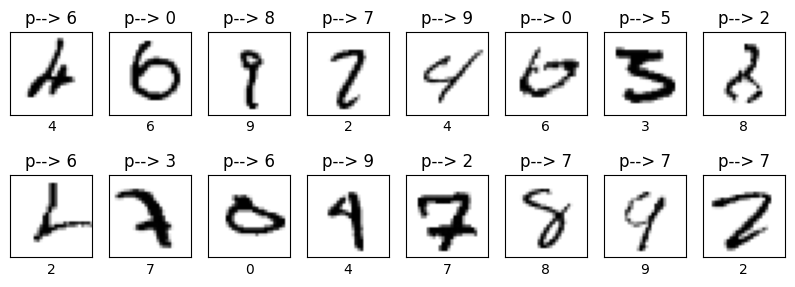

In [ ]:
nplots = 16
fig = plt.figure(figsize=(10, 3.4))
for j, k in enumerate(idx_miss[0]):
  plt.subplot(2, 8, j+1)
  plt.imshow(X_test[k].reshape(28, 28), cmap=plt.cm.gray_r)
  plt.title('p--> {0}'.format(y_pred_cls[k]))
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(y_test[k])
  if j >= nplots - 1:
    break

plt.show()

# Workshop 12: เขียนตัวเลขด้วยลายมือแล้วทำนาย

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale

In [ ]:
def predict_digit(imgs):
  y_pred = [] ; y_pred_cls = [] ; img_lst = []

  for i in imgs:
    img = load_img(i, target_size=(28, 28))
    img = ImageOps.invert(img)
    img = img_to_array(img)
    img = rgb_to_grayscale(img)
    img = img / 255.0
    img_lst.append(img)

    img = np.expand_dims(img, axis=0)
    y_pred_i = model.predict(img)
    y_pred_cls_i = np.argmax(y_pred_i, -1)
    y_pred.append(y_pred_i)
    y_pred_cls.append(y_pred_cls_i)
  return img_lst, y_pred_cls, y_pred

imgfiles = ['digit0.png', 'digit1.png', 'digit2.png', 'digit3.png', 'digit4.png', 
            'digit5.png', 'digit6.png', 'digit7.png', 'digit8.png', 'digit9.png']

img_lst, y_pred_cls, y_pred = predict_digit(imgfiles)

1/1 [==============================] - 0s 17ms/step


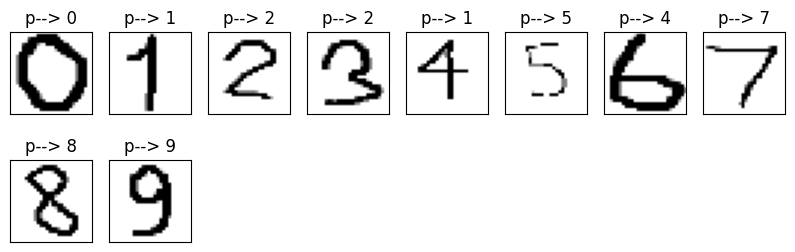

In [ ]:
fig = plt.figure(figsize=(10, 4.7))
for i, k in enumerate(img_lst):
  plt.subplot(3, 8, i+1)
  plt.imshow(k, cmap=plt.cm.gray_r)
  plt.title('p--> {0}'.format(y_pred_cls[i][0]))
  plt.xticks([])
  plt.yticks([])
plt.show()

# Workshop 14: Deploy Model บน  Web

In [ ]:
! pip install flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import json
from flask import Flask, request
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

In [ ]:
model = load_model('mymodel.h5')
print("model: ", model.get_config()['layers'][0]['config']['batch_input_shape'])

model:  (None, 28, 28, 1)


In [ ]:
app = Flask(__name__)
@app.route('/model', methods=['POST'])
def run_model():
  req_data = request.get_json(force=True)
  image_data = req_data['img']
  img = np.array(image_data).reshape(28, 28, 1)

  image = np.array(image_data).reshape(1, 28, 28, 1)
  pred = model.predict(image)
  digit = np.argmax(pred)
  return str(digit)

if __name__ == '__main__':
  app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
import numpy as np
import json
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale
from PIL import Image, ImageOps

In [ ]:
img = load_img('digit2.png', target_size=(28, 28))
ing = ImageOps.invert(img)
img = img_to_array(img)
img = rgb_to_grayscale(img)
img = img / 255.0

img_lst = np.squeeze(img).tolist()
data = json.dumps({'img':img_lst})
url = 'http://127.0.0.1:5000'

# response = request.post(url, data)
# print('Digit =', response.text)

# Workshop 15: แปลง .h5 เป็น TensorFlow Lite

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf

## แบบปกติ

In [ ]:
model = load_model('mymodel.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

f = open('digit_float.tflite', 'wb')
f.write(tflite_float_model)
f.close()

float_model_size = len(tflite_float_model) / 1024
print('Float model size = %d KBs.' % float_model_size)

Float model size = 882 KBs.


## แบบ Optimization

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

quantized_model_size = len(tflite_quantized_model) / 1024
print('Ouantized model size = %d KBs,' % quantized_model_size)
print('which is about %d%% of the float model size.' % (quantized_model_size * 100 / float_model_size))
f = open('digit_quantized.tflite', 'wb')
f.write(tflite_quantized_model)
f.close()

Ouantized model size = 225 KBs,
which is about 25% of the float model size.


## การเรียกใช้ TensorFlow Lite

In [ ]:
import tensorflow as tf
from time import time

In [ ]:
img = np.array(img)
img.shape

(28, 28, 1)

In [ ]:
img = img.reshape(1, 28, 28, 1)
img.shape

(1, 28, 28, 1)

In [ ]:
tflite_path = 'digit_float.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_path)
interpreter.allocate_tensors()
input = interpreter.get_input_details()
input_tensor_index = input[0]['index']
output = interpreter.tensor(interpreter.get_output_details()[0]['index'])

interpreter.set_tensor(input_tensor_index, img)
interpreter.invoke()

digit = np.argmax(output()[0])
print(digit)

8
